In [1]:
# System wspomagania decyzji inwestorskich
# Paweł Kowalski

In [2]:
# sprawdzenieczasu działania programu
import time as tm
start_time = tm.time()

In [3]:
# import bibliotek
import yfinance as yf
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib 
import sklearn  
import statsmodels 
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from plik_tickers import tickers 

In [4]:
# Sprawdzanie wersji Phytona
import sys 
print(f"Python: {sys.version}")

Python: 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]


In [5]:
# Sprawdzanie wersji bibliotek
print(f"yfinance: {yf.__version__}")
print(f"numpy: {np.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"tensorflow: {tf.__version__}")
print(f"scikit-learn: {sklearn.__version__}")
print(f"seaborn: {sns.__version__}")
print(f"statsmodels: {statsmodels.__version__}")

yfinance: 0.1.67
numpy: 1.24.3
matplotlib: 3.7.1
tensorflow: 2.11.0
scikit-learn: 1.2.2
seaborn: 0.12.2
statsmodels: 0.13.5


In [6]:
# ustawienie ziarna i czyszczenie
tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [7]:
# wybór tickers'a , tu musi być np. lista rozwijana
for symbol, name in tickers.items():
    print(f"Symbol: {symbol} - Name: {name}")

Symbol: ES=F - Name: S&P 500
Symbol: YM=F - Name: Mini Dow Jones Indus
Symbol: NQ=F - Name: Nasdaq 100
Symbol: RTY=F - Name: E-mini Russell 2000 Index Futur
Symbol: ZB=F - Name: U.S. Treasury Bond Futures
Symbol: ZN=F - Name: 10-Year T-Note Futures
Symbol: ZF=F - Name: Five-Year US Treasury Note Futu
Symbol: ZT=F - Name: 2-Year T-Note Futures
Symbol: GC=F - Name: Gold
Symbol: MGC=F - Name: Micro Gold Futures
Symbol: SI=F - Name: Silver
Symbol: PL=F - Name: Platinum
Symbol: HG=F - Name: Copper
Symbol: PA=F - Name: Palladium
Symbol: CL=F - Name: Crude Oil
Symbol: HO=F - Name: Heating Oil
Symbol: NG=F - Name: Natural Gas
Symbol: RB=F - Name: RBOB Gasoline
Symbol: BZ=F - Name: Brent Crude Oil
Symbol: B0=F - Name: Mont Belvieu LDH Propane
Symbol: ZC=F - Name: Corn Futures, Dec-2024
Symbol: ZO=F - Name: Oat Futures, Dec-2024
Symbol: KE=F - Name: KC HRW Wheat Futures
Symbol: ZR=F - Name: Rough Rice Futures, Sep-2024
Symbol: ZM=F - Name: S&P Composite 1500 ESG Tilted I
Symbol: ZL=F - Name: Soy

In [8]:
# pobranie danych ze strony Yahoo (po testach wpisać np. rok  2000 !
start = "2004-01-01"
end = date.today().strftime("%Y-%m-%d")
ticker = "BZ=F" # możliwość wyboru np 10
data = yf.download(ticker, start=start, end=end)
print(data.shape)

[*********************100%***********************]  1 of 1 completed
(4197, 6)


In [9]:
# Kontrola jakości danych
print(data.info())
print(data.describe())
print('head', data.head(5))
print('tail', data.tail(5))
print(type(data))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4197 entries, 2007-07-30 to 2024-06-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4197 non-null   float64
 1   High       4197 non-null   float64
 2   Low        4197 non-null   float64
 3   Close      4197 non-null   float64
 4   Adj Close  4197 non-null   float64
 5   Volume     4197 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 229.5 KB
None
              Open         High          Low        Close    Adj Close  \
count  4197.000000  4197.000000  4197.000000  4197.000000  4197.000000   
mean     78.716612    79.680217    77.699061    78.720000    78.720000   
std      24.676631    24.794818    24.546994    24.694999    24.694999   
min      19.559999    21.270000    16.000000    19.330000    19.330000   
25%      59.200001    60.240002    58.349998    59.270000    59.270000   
50%      76.879997    77.790001    75.830002    77.0500

In [10]:
# wybór danych z kolumny 'Close'
series = data.Close.to_numpy()
#print(series)

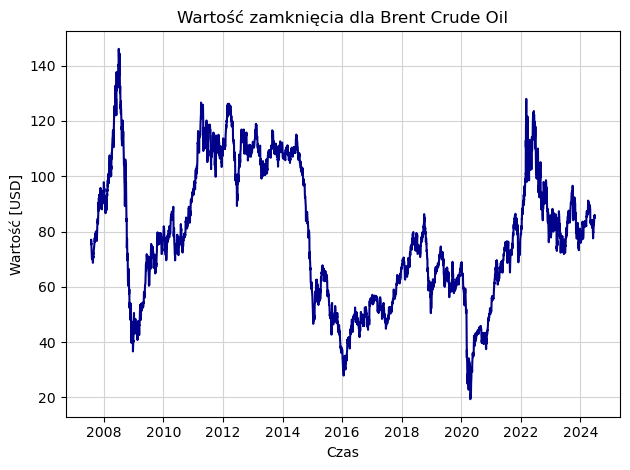

In [11]:
# Tworzenie wykresu z danych
plt.plot(data.index, data["Close"], linestyle='-', color='darkblue')  # Wykres linii
plt.xlabel('Czas')
plt.ylabel('Wartość [USD]')
plt.title(f'Wartość zamknięcia dla {tickers[ticker]}')
plt.grid(color='lightgray')
plt.tight_layout()
plt.show()

In [12]:
# def. wykres
def plot_series(time, series_scaled, format="-", start = 0, end = None):
    plt.plot(time[start:end], series_scaled[start:end], format)
    plt.xlabel("Czas")
    plt.ylabel("Wartość")
    plt.grid(True)

In [13]:
# przygotowanie danych do wykresu
data_1 = data
data_1['Month'] = data_1.index.month
data_1['Year'] = data_1.index.year

days = 1825 # ostatnie dni
days_ses = int(days/7*5) # dni sesyjne
data_3 = data_1[-days_ses:]

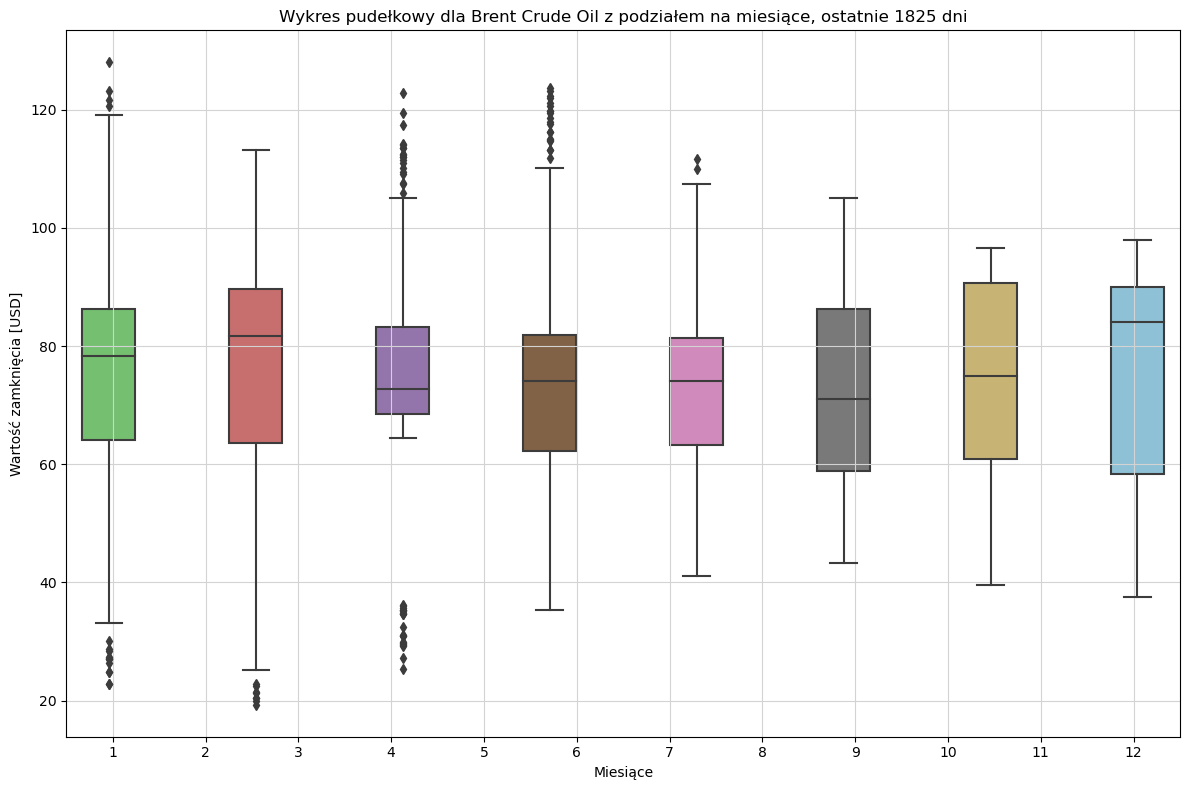

In [14]:
# Tworzenie wykresu pudełkowego
fig, ax1 = plt.subplots(ncols=1, figsize=(12, 8))
sns.boxplot(data=data_3, x='Month', y='Close', ax=ax1, hue='Month', palette='muted',width=7)
plt.ylabel('Wartość zamknięcia [USD]')
plt.xlabel('Miesiące')
plt.title(f'Wykres pudełkowy dla {tickers[ticker]} z podziałem na miesiące, ostatnie {days} dni')  # Tytuł wykresu
plt.grid(color='lightgray')
ax1.get_legend().remove()
plt.tight_layout()
plt.show()

In [15]:
# przygotowanie danych do dekompozycji + regresja
result = seasonal_decompose(data.Close[:], model='None', period=720)
result_trend = result.trend.dropna()
data_decomp = result_trend.reset_index()
data_decomp['Date_num'] = mdates.date2num(data_decomp.Date)
model = LinearRegression()
X = data_decomp[['Date_num']]
y = data_decomp['trend']
model.fit(X, y)
y_pred = model.predict(X)

In [16]:
# przygotowanie danych do dekompozycji + regresja
result_observed = result.observed.dropna()
data_obs = result_observed.reset_index()
data_obs['Date_num'] = mdates.date2num(data_obs.Date)
model = LinearRegression()
X1 = data_obs[['Date_num']]
y1 = data_obs['Close']
model.fit(X1, y1)
y_pred_1 = model.predict(X1)

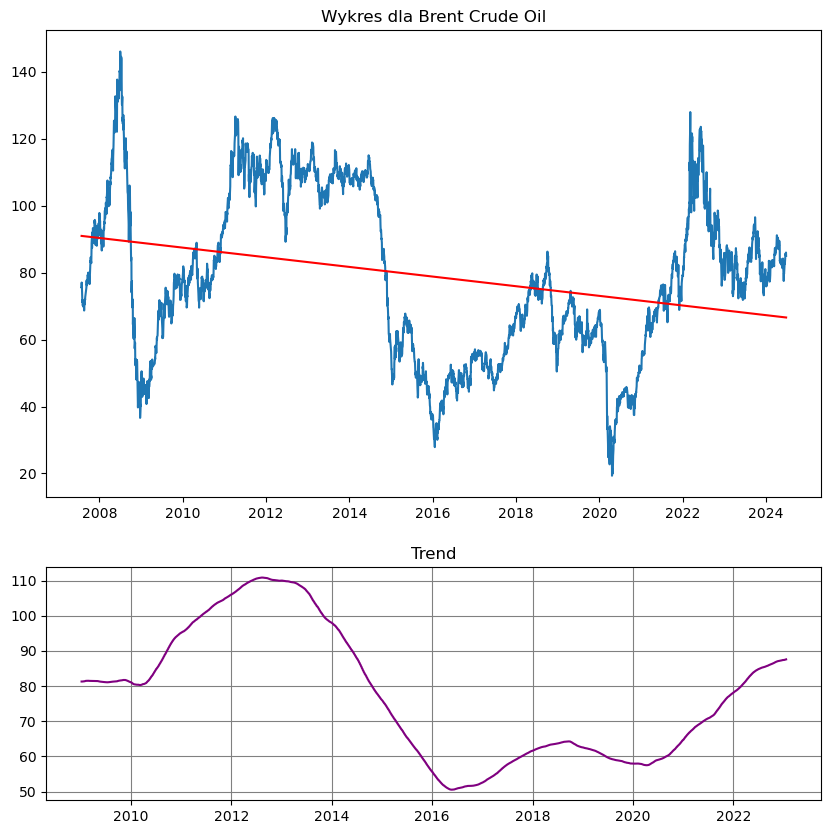

In [17]:
#wykres dekompozycji + regresja
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1 ]})
ax0.set_title(f'Wykres dla {tickers[ticker]}')
ax0.plot(result.observed)
ax0.plot(data_obs['Date'], y_pred_1, color='red')
ax1.set_title('Trend')
ax1.plot(result.trend, color='purple')
plt.grid(color='gray')
plt.show()

In [ ]:
# skalowanie danych
scaler = MinMaxScaler(feature_range=(0, 1))
series_scaled = scaler.fit_transform(series.reshape(-1, 1)).flatten()

In [ ]:
time = np.arange(len(series_scaled), dtype="float32")
#print(len(time))
#wykres pomocniczy
# plt.figure(figsize=(8, 5))
# plot_series(time, series_scaled)
# plt.show()

In [ ]:
# Przygotowanie danych do uczenia
split_time = int(len(series_scaled)*0.8)
time_train = time[:split_time]
x_train =series_scaled[:split_time]
time_valid = time[split_time:]
x_valid = series_scaled[split_time:]

#wykres pomocniczy
# plt.figure(figsize=(8, 5))
# plot_series(time_valid, x_valid)
# plt.show()

In [ ]:
# ustawienie parametrów uczenia
epochs = 50 # tu może być wybór z podpowiedzią min 50
# niestety model jest tylko dla danego ticker'a.
# Będziemy trenować 100 modeli, czy czekamy na trening? Możemy założyć zewnętne zasoby

window_size = 25 # tu się musimy zastanowić - powiązanie okna z predykcją
batch_size = 64
shuffle_buffer_size = 300

In [ ]:
# zestaw danych do trenowania modelu uczenia maszynowego
def windowed_dataset(series_scaled, window_size, batch_size, shuffle_buffer_size):
    series_scaled = tf.expand_dims(series_scaled, axis=-1)
    dataset = tf.data.Dataset.from_tensor_slices(series_scaled)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer_size).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [ ]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
valid_dataset = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [ ]:
# Definicja modelu -> wybór

# długi czas
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(100, input_shape = [window_size], activation="relu"),
#     tf.keras.layers.Dense(100, activation="relu"),
#     tf.keras.layers.Dense(1)
# ])
# krótki czas
model = tf.keras.models.Sequential([
  tf.keras.layers.SimpleRNN(100, input_shape=[None, 1], return_sequences=True),
  tf.keras.layers.SimpleRNN(100),
  tf.keras.layers.Dense(1),
])

In [ ]:
# zatrzymanie przy braku postępów
stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [ ]:
# uczenie
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4, momentum=0.7)
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=['mae'])
history = model.fit(dataset, epochs=epochs,  verbose=1, validation_data=valid_dataset, callbacks=[stop_early])

In [ ]:
#przewidywania wartości na podstawie modelu trenowanego
def model_forecast(model, series_scaled, window_size):
    series = tf.expand_dims(series_scaled, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series_scaled)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [ ]:
forecast = model_forecast(model, series_scaled[split_time - window_size: -1], window_size)[:,0]

In [ ]:
# odwrócenie skalowania danych
forecast = scaler.inverse_transform(forecast.reshape(-1, 1))
x_valid = scaler.inverse_transform(x_valid.reshape(-1, 1))

In [ ]:
# Obliczenie błędu
mae_metric = tf.keras.metrics.MeanAbsoluteError()
mae_metric.update_state(x_valid, forecast)
mae = mae_metric.result().numpy()
mean_value = np.mean(x_valid)
percentage_error = np.abs(mae / mean_value) * 100
percentage_error_rounded = round(percentage_error, 2)
print("Błąd wynosi:", percentage_error_rounded, '%') # ta informacja jest wazna

In [ ]:
future_forecast = []
last_window = series_scaled[-window_size:]

num_days = 10 # to będzie do wprowadzenia max 10

for _ in range(num_days):
    prediction = model.predict(last_window[np.newaxis])
    future_forecast.append(prediction[0, 0])
    last_window = np.roll(last_window, -1)
    last_window[-1] = prediction[0, 0]

future_forecast = np.array(future_forecast)
future_forecast = scaler.inverse_transform(future_forecast.reshape(-1, 1))

In [ ]:
# wykres predykcji
plt.figure(figsize=(10, 6))
plt.plot(time_valid[-100:], x_valid[-100:], label='dane treningowe')
plt.plot(time_valid[-100:], forecast[-100:], label='dane walidacyjne')
time_future = np.arange(len(series), len(series) + num_days)
plt.title(f'Wartość zamknięcia dla {tickers[ticker]}')
plt.ylabel('Wartość [USD]')
plt.xlabel('Dni')
plt.plot(time_future, future_forecast, label='prognoza')
plt.legend()
plt.show()

In [ ]:
future_forecast = np.round(future_forecast, 2)
print("wartości predykcji:")
print(future_forecast)

In [ ]:
# całe wykonanie kodu w Jupyter, to ok 30s. Nie jest źle :)
total_time = tm.time()
print(f"Całkowity czas wykonania: {total_time - start_time:.4f} sekundy")